In [1]:
library('tidyverse')
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Tiles

This is a dataset of otter skull morphology.

In [2]:
# uncomment the following
otter.data = read.csv('https://jcoliver.github.io/learn-r/data/otter-mandible-data.csv') %>%
gather(characteristic, value, -species, -museum, -accession)

otter.data %>% head

,species,museum,accession,characteristic,value
,<chr>,<chr>,<chr>,<chr>,<dbl>
1,A. cinerea,AMNH,101458,m1,15.100
2,A. cinerea,AMNH,101461,m1,12.740
3,A. cinerea,AMNH,101466,m1,12.425
4,A. cinerea,AMNH,101635,m1,13.400
5,A. cinerea,AMNH,101459,m1,14.400
6,A. cinerea,AMNH,101462,m1,14.525


Make a bar chart of the museum column. What is this chart telling you?

In [3]:
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)

Make a heatmap of the data with `characteristic` on the x-axis and `species` on the y-axis.

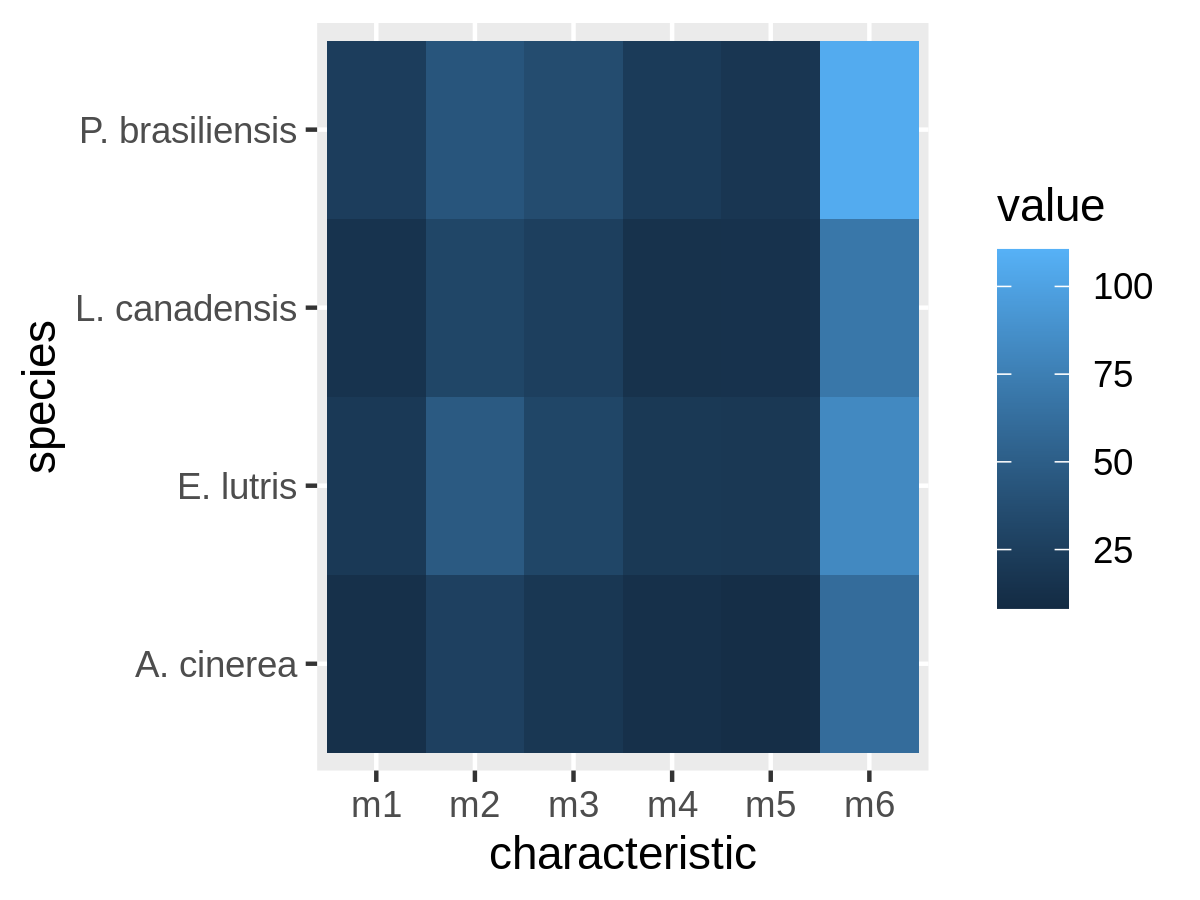

In [4]:
p=ggplot(otter.data, aes(x=characteristic, y=species, fill=value))+geom_tile()
p

In [5]:
# uncomment this to get a scaled version of the data:

otter.data.scaled = otter.data %>%
group_by(characteristic) %>%
mutate(value.scaled = scales::rescale(value))

otter.data.scaled %>% head

species,museum,accession,characteristic,value,value.scaled
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
A. cinerea,AMNH,101458,m1,15.100,0.27867699
A. cinerea,AMNH,101461,m1,12.740,0.11259676
A. cinerea,AMNH,101466,m1,12.425,0.09042928
A. cinerea,AMNH,101635,m1,13.400,0.15904293
A. cinerea,AMNH,101459,m1,14.400,0.22941590
A. cinerea,AMNH,101462,m1,14.525,0.23821253


In [6]:
options(repr.plot.width=5, repr.plot.height=2.5, repr.plot.res = 300)

What can you do to make the chart more visually appealing?
- make the `color` white
- use `scale_fill_gradient(low = "white", high = "steelblue")`

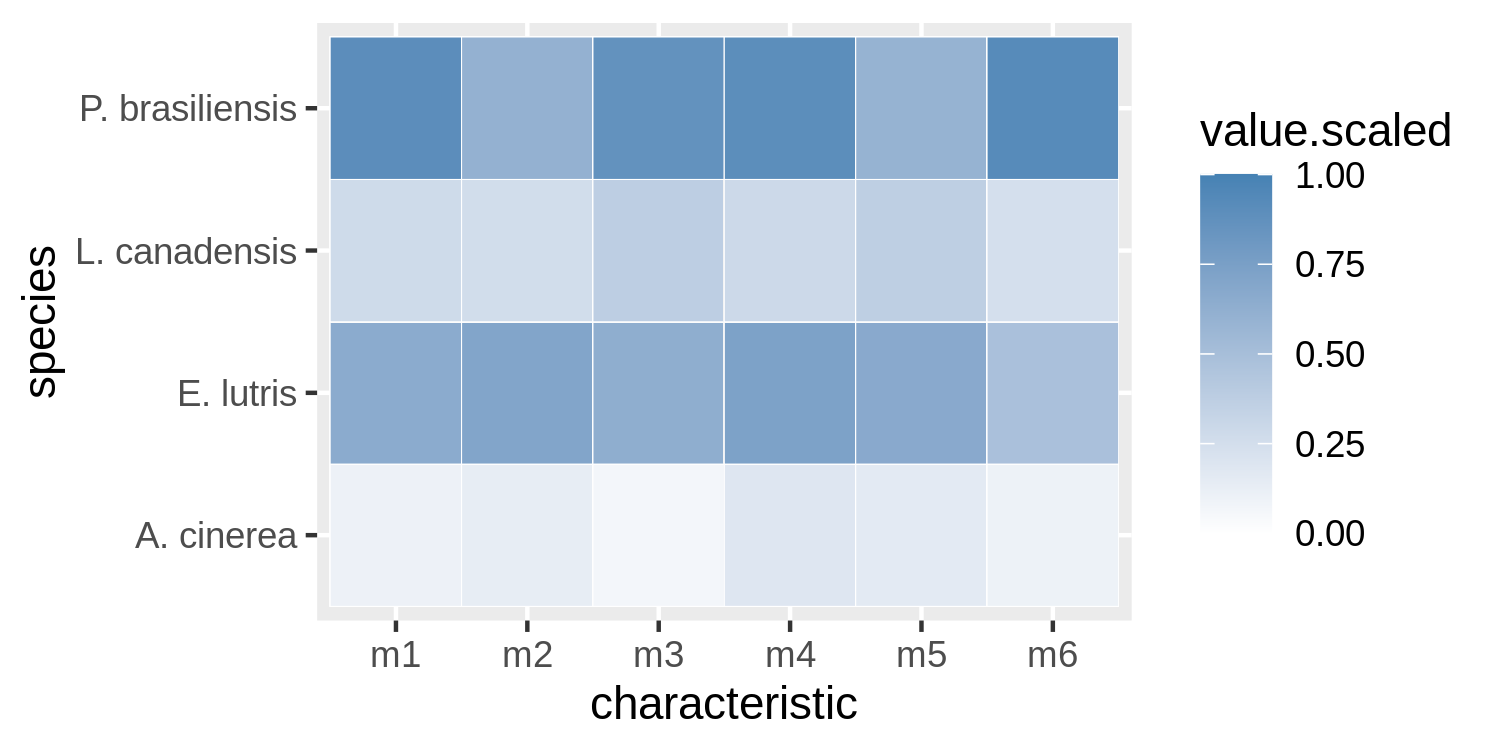

In [7]:
p = ggplot(otter.data.scaled, 
           aes(x = characteristic, y = species, fill = value.scaled))

p = p + geom_tile(color = 'white')

p = p + scale_fill_gradient(low = "white", high = "steelblue")

p

# Points with jitter

Let's stick with the otter data. We could also use a point+jitter plot to represent the data. Make a point+jitter plot below with species on the x-axis, value on the y-axis, and facet the chart by characteristic. 

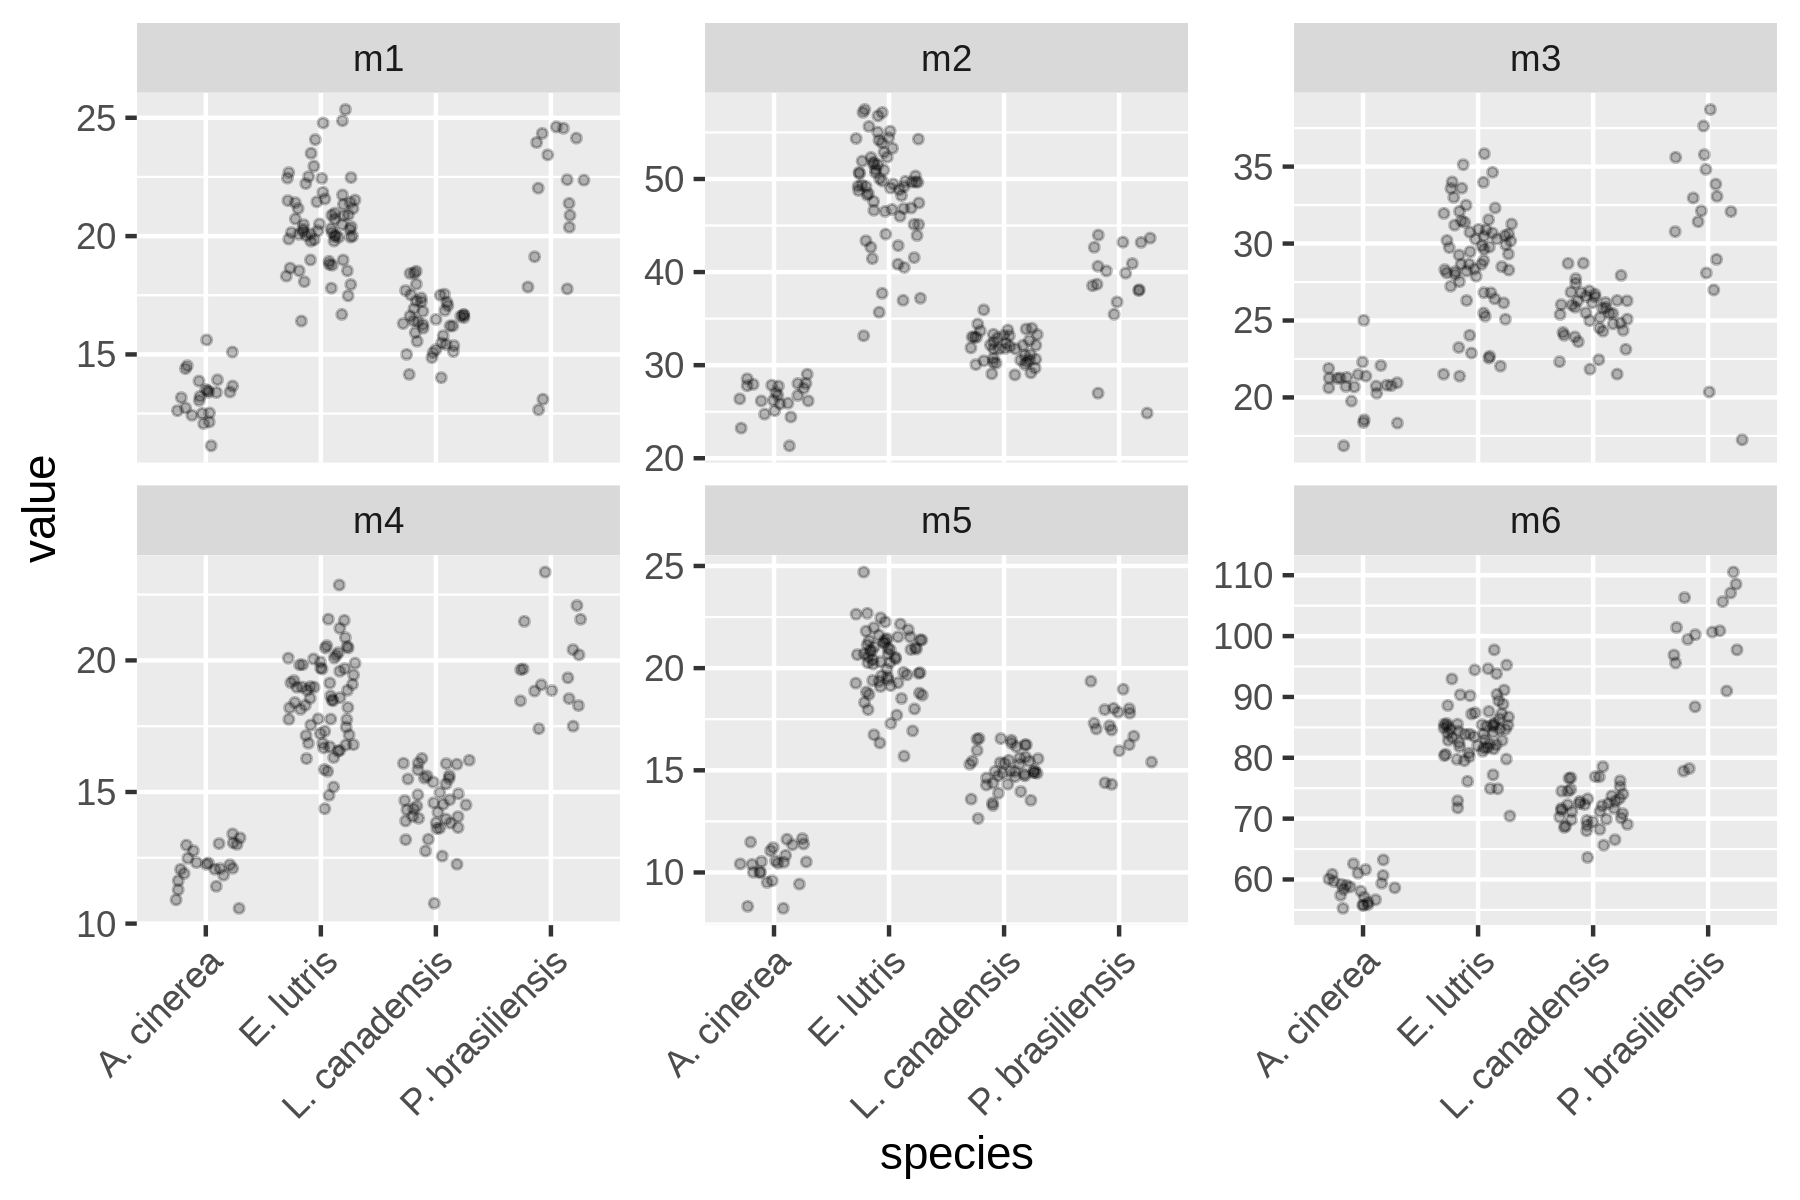

In [30]:
options(repr.plot.width=6, repr.plot.height=4, repr.plot.res = 300)
p = ggplot(otter.data, aes(x = species, y = value)) + geom_point(na.rm = T, size = 0.8, alpha = 0.25, position = position_jitter(height = 0, width = 0.3)) + facet_wrap(~characteristic, scales = 'free_y') + theme(axis.text.x = element_text(angle = 45, hjust =1))
p                                                                 
                                                               

                                                        


Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”


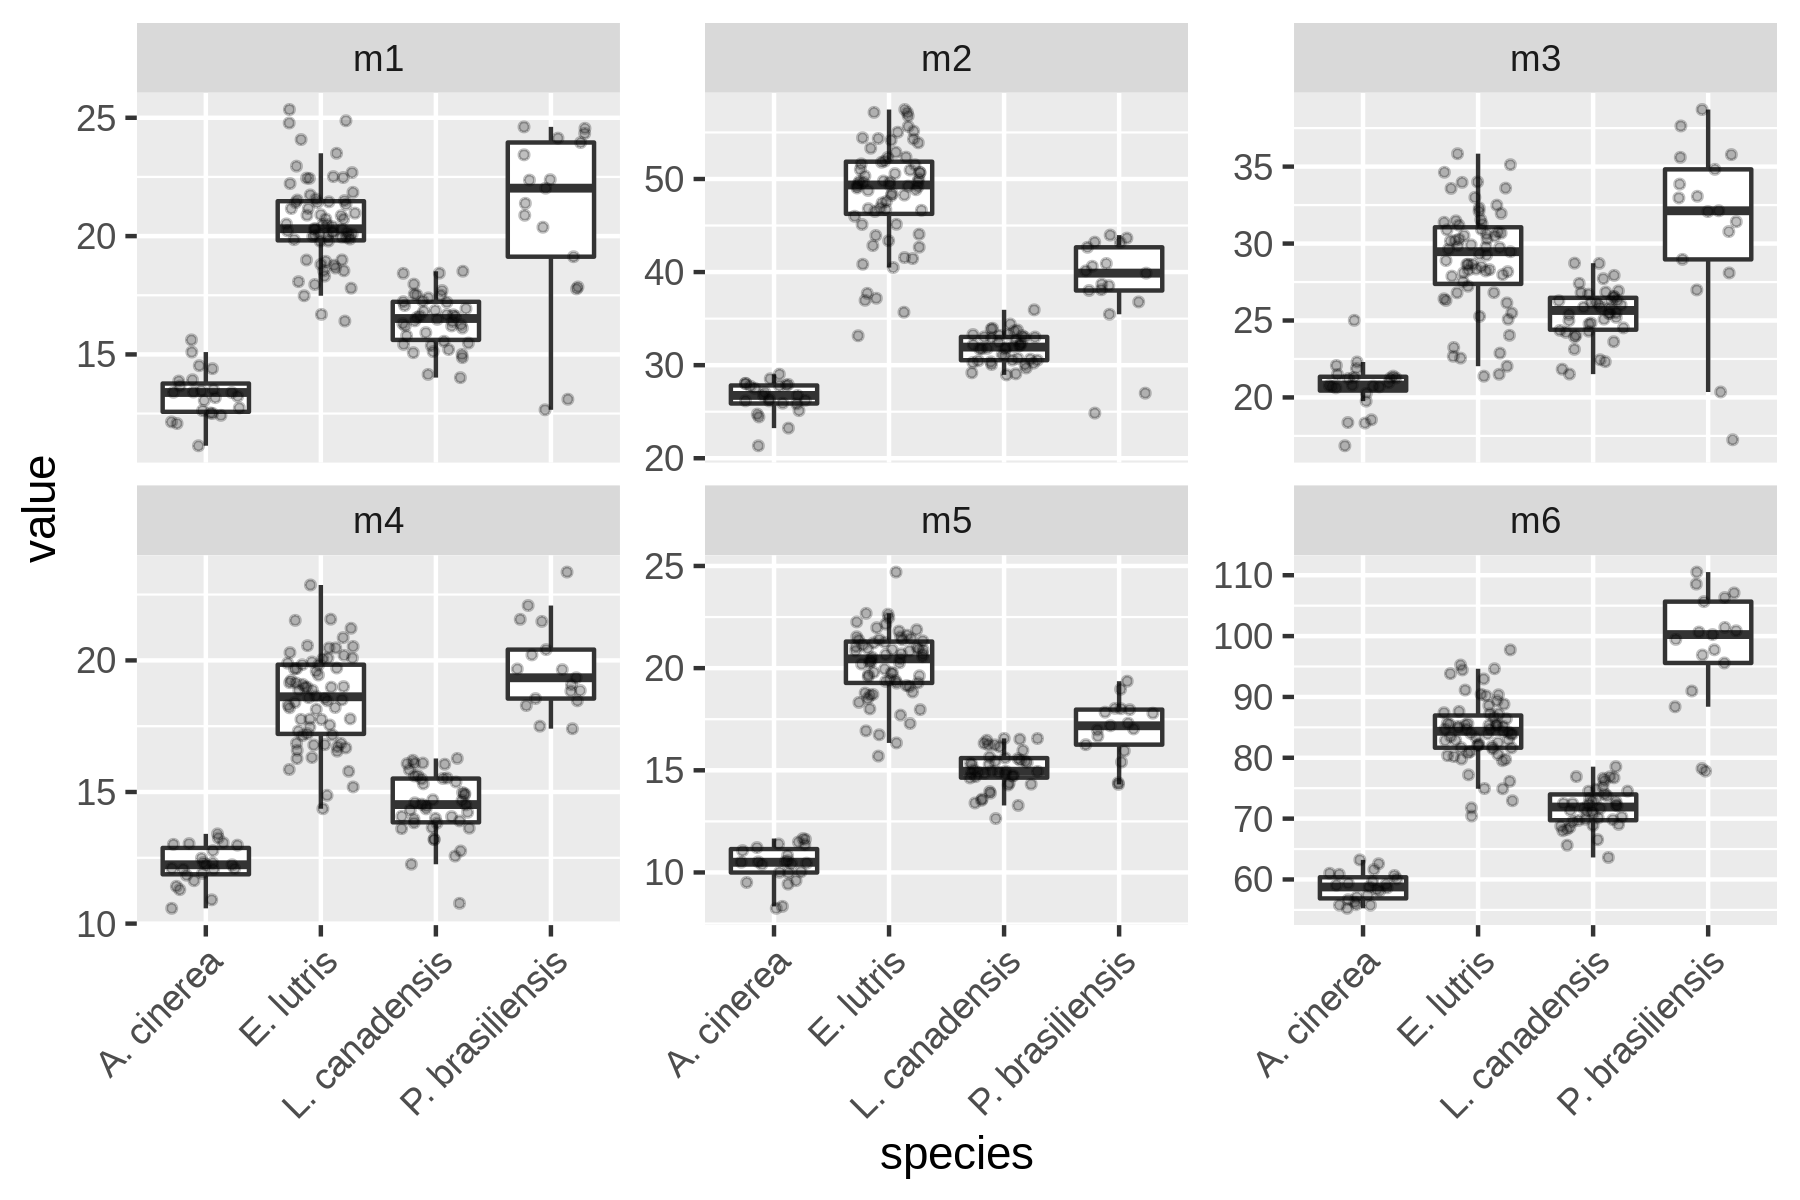

In [31]:
options(repr.plot.width=6, repr.plot.height=4, repr.plot.res = 300)

p = ggplot(otter.data, aes(x = species, y = value)) + 
    geom_boxplot(outlier.shape = NA) +
    geom_point(na.rm = T, size = 0.8, alpha = 0.25, position = position_jitter(height = 0, width = 0.3)) + 
    facet_wrap(~characteristic, scales = 'free_y') +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

p

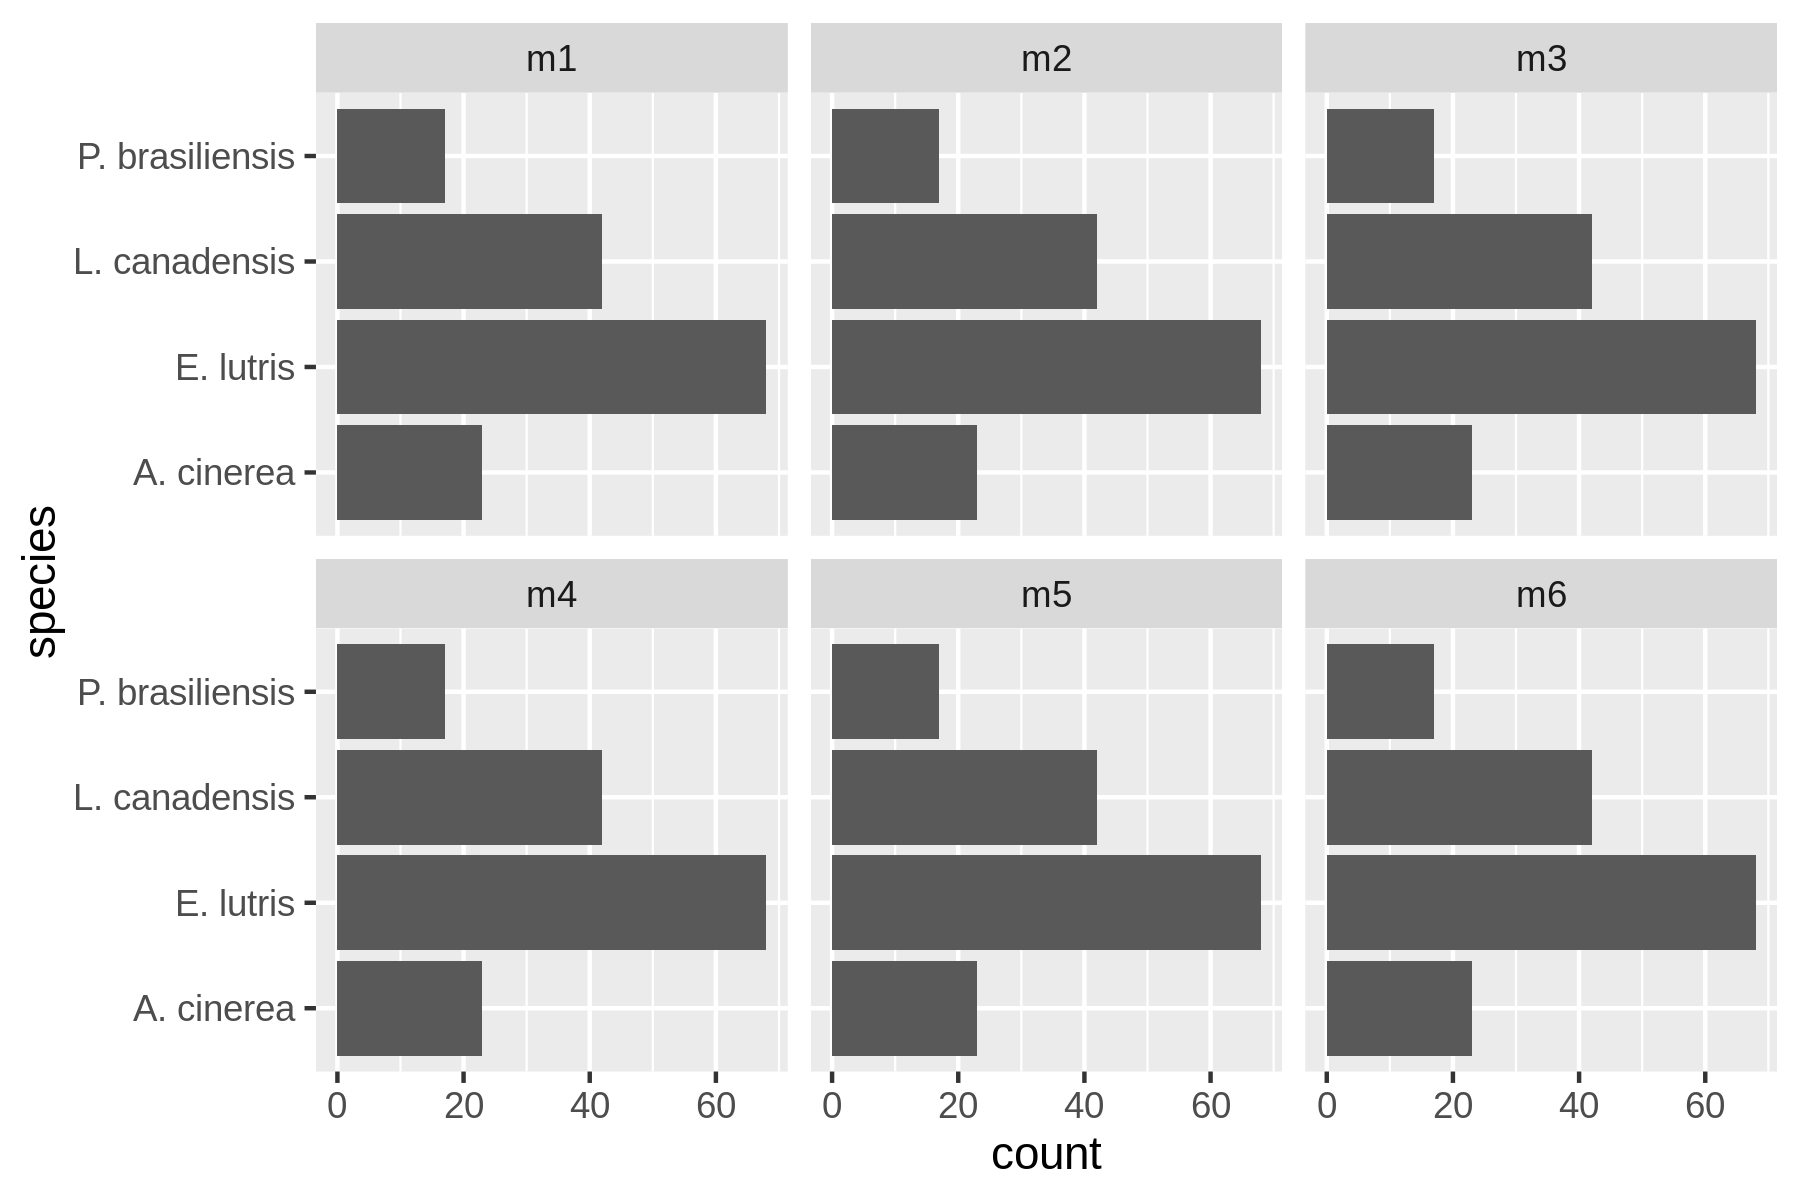

In [36]:
p=ggplot(otter.data, aes(y=species)) + geom_bar() + facet_wrap(~characteristic)
p

Make the axis test legible by rotating the text 45 degrees.

What happens if you pass the argument `scales='free_y` to `facet_wrap`?

Do you prefer the heatmap or the point+jitter plot?